In [1]:
%pip install seaborn
import pandas as pd 
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# loading the data set 
data = pd.read_csv('youtube_data.csv')
data.head()

,video_id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url,title,description,hashtags,views,likes,comments
0,--F7dc-_FSI,180,5777,5640,1920,1080,25.00,25.00,h264,News & Politics,https://www.youtube.com/watch?v=--F7dc-_FSI,«السودان ينتفض» أمام السفارة بالقاهرة,حرية سلام وعدالة، الثورة خيار الشعب.. بهذا اله...,"في, عسكري, حكم, حرية, بخصوص, المصري اليوم, الس...",4078,41,3
1,--cCAD-8Y_U,930,1195,1001,1280,720,30.00,30.00,h264,Gaming,https://www.youtube.com/watch?v=--cCAD-8Y_U,Pokemon Tower Defense Episodio 2,Espero que tenham gostado do video!,"Pokémon (Anime/Manga Franchise), Pokémon (Vide...",33,2,1
2,--g2gG8pQ0w,233,3028,2833,1280,720,23.98,23.98,h264,Comedy,https://www.youtube.com/watch?v=--g2gG8pQ0w,New Hip Hop - Kemo Treats - Pancakes,Download all our music for FREE just enter $0....,"breaking bad spoof, Recipes, Pancakes, canada,...",13227,135,17
3,-0DR7-voRCU,562,431,300,320,240,29.97,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-0DR7-voRCU,Sister's Keeper Impression,A Review of the Shampoo Bar(Sunburst) and Dip ...,"natural hair, first impression, sister's keepe...",43,1,0
4,-0Fkp-2EzX0,300,3087,2929,1280,720,23.98,23.98,h264,Gaming,https://www.youtube.com/watch?v=-0Fkp-2EzX0,JBHAMMER777 (AKUMA) VS KtossPol Rank 1 (Vega)...,JBHAMMER777 is he strong enough to fight again...,"Tokido, momochi, (Ryu), AE, 11, at, Piyoppia, ...",222,2,0


Overview Of The DataSet 

In [3]:
data.describe()


,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),views,likes,comments
count,17589.000000,17589.000000,17589.000000,17589.000000,17589.000000,17589.000000,17589.000000,1.758900e+04,17589.000000,17589.000000
mean,241.551936,1271.354369,1150.418443,766.781170,504.591961,26.467639,9.471172,6.894158e+04,208.862641,12.899312
std,493.026994,1375.359875,1351.800202,467.289304,262.727746,6.039748,13.253197,3.537491e+06,8477.504735,225.839378
min,1.000000,0.000000,0.000000,108.000000,88.000000,3.750000,0.000000,0.000000e+00,0.000000,0.000000
25%,51.000000,437.000000,326.000000,426.000000,320.000000,25.000000,0.000000,3.800000e+01,0.000000,0.000000
50%,135.000000,743.000000,632.000000,640.000000,480.000000,29.970000,0.000000,1.520000e+02,1.000000,0.000000
75%,268.000000,1293.000000,1184.000000,960.000000,720.000000,29.970000,25.000000,8.000000e+02,4.000000,1.000000
max,25845.000000,22421.000000,22229.000000,2592.000000,1944.000000,59.080000,30.000000,4.103849e+08,836981.000000,16634.000000


In [4]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17589 entries, 0 to 17588
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   video_id          17589 non-null  object 
 1   duration          17589 non-null  int64  
 2   bitrate           17589 non-null  int64  
 3   bitrate(video)    17589 non-null  int64  
 4   height            17589 non-null  int64  
 5   width             17589 non-null  int64  
 6   frame rate        17589 non-null  float64
 7   frame rate(est.)  17589 non-null  float64
 8   codec             17589 non-null  object 
 9   category          17589 non-null  object 
 10  url               17589 non-null  object 
 11  title             17589 non-null  object 
 12  description       16477 non-null  object 
 13  hashtags          16013 non-null  object 
 14  views             17589 non-null  int64  
 15  likes             17589 non-null  int64  
 16  comments          17589 non-null  int64 

here in the above section we notice a certain discontinuty in description and hastags 

<Figure size 640x480 with 0 Axes>

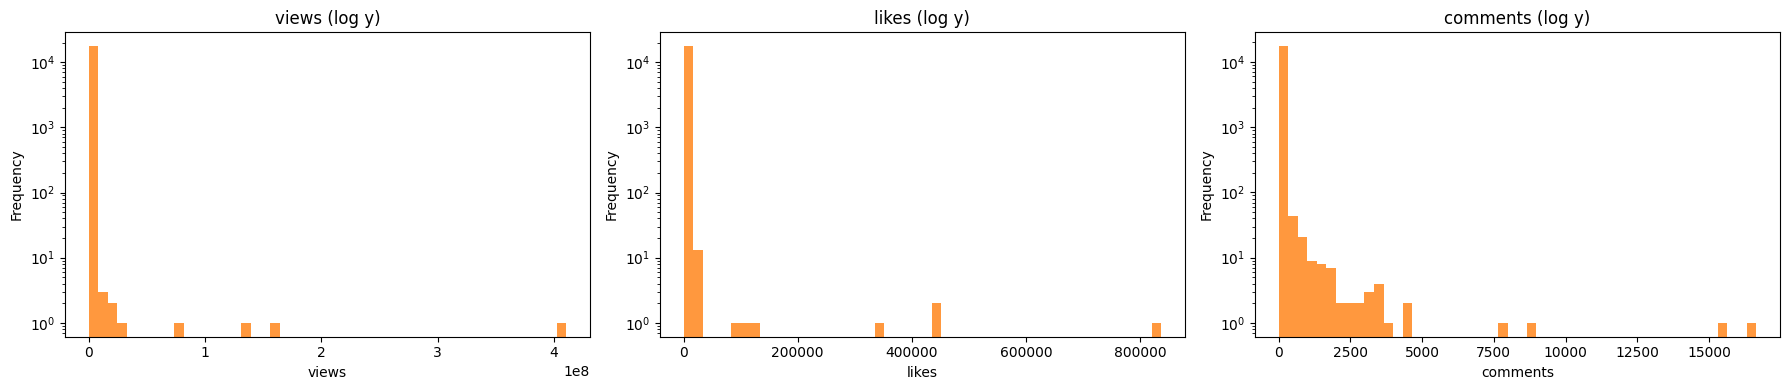

In [5]:

# improve layout and show
plt.suptitle("Distributions of numeric columns", fontsize=16, y=1.02)
plt.tight_layout()
plt.subplots_adjust(top=0.93)

# additionally plot log-scaled histograms for skewed count columns
skew_cols = ['views', 'likes', 'comments']
fig, axes = plt.subplots(1, len(skew_cols), figsize=(18,4))
for ax, col in zip(axes, skew_cols):
    data[col].plot.hist(ax=ax, bins=50, color='C1', alpha=0.8)
    ax.set_yscale('log')
    ax.set_title(f'{col} (log y)')
    ax.set_xlabel(col)
plt.tight_layout()
plt.show()

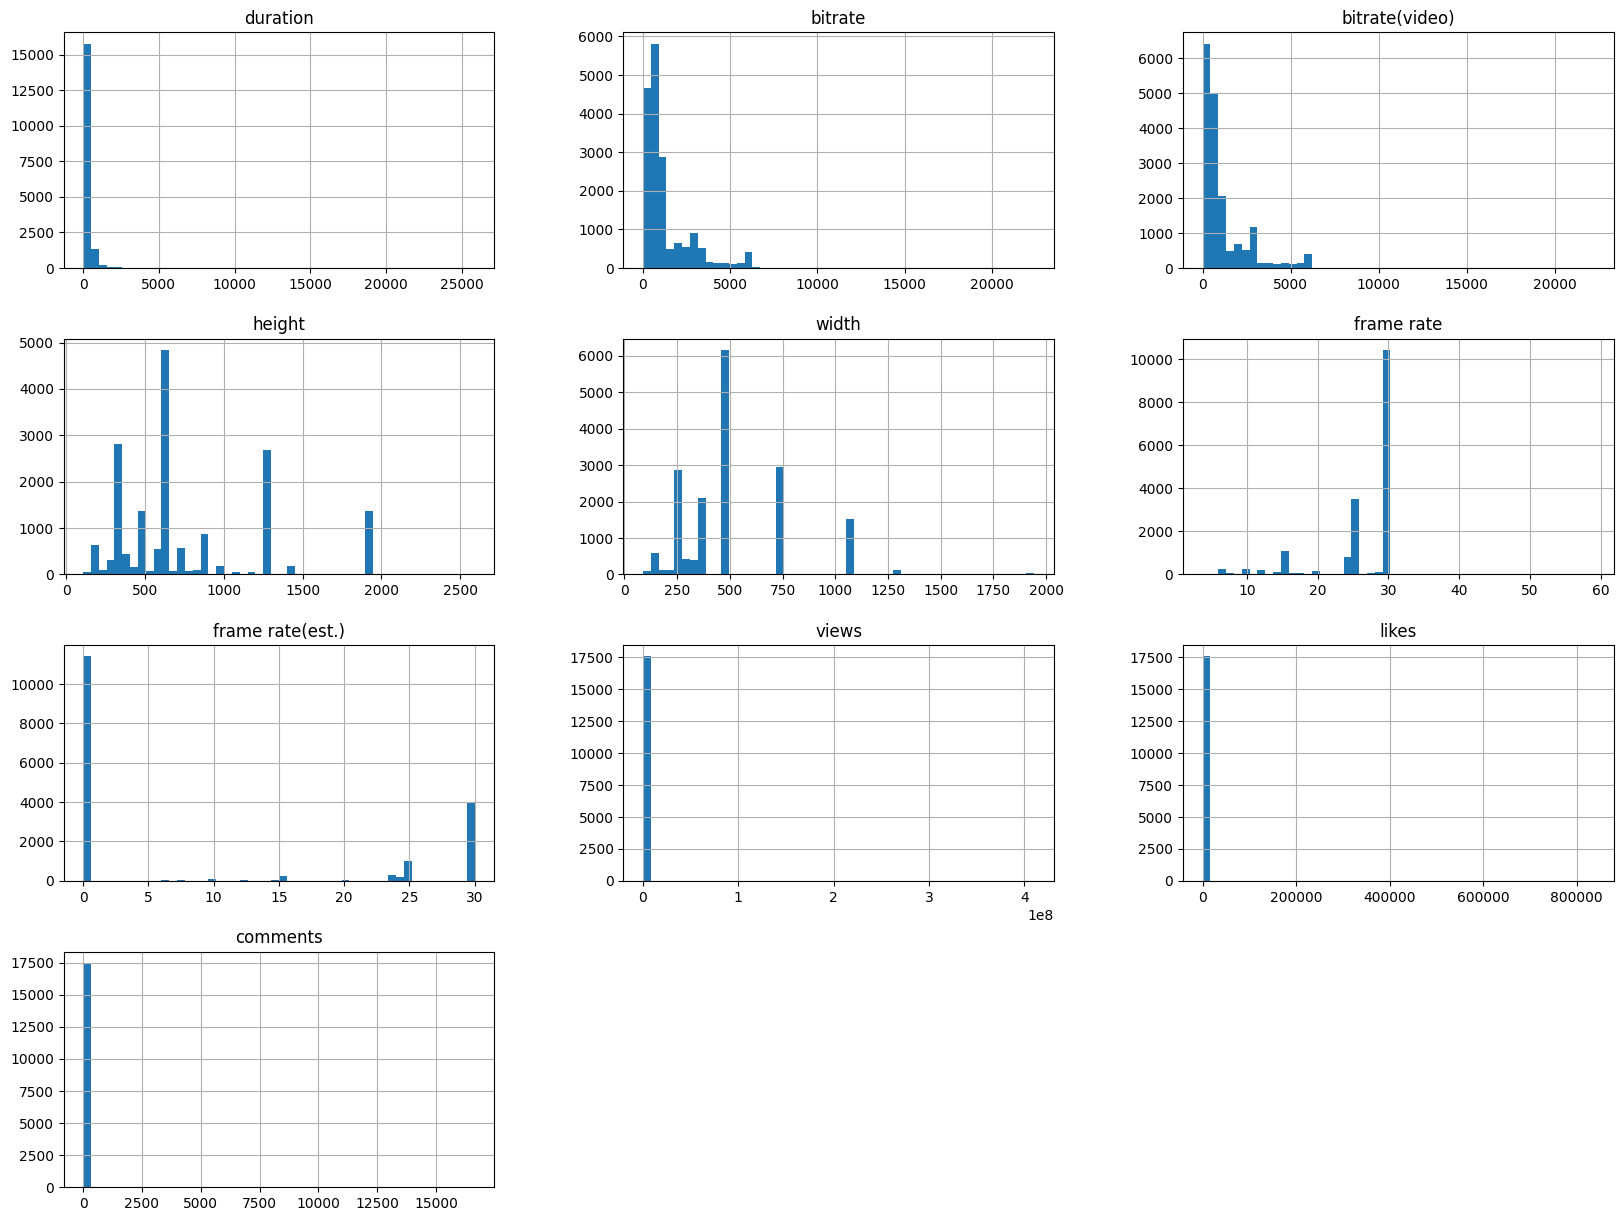

In [6]:
data.hist(bins=50, figsize=(20,15))
plt.show()

creating the test set 

2. def test_set_check(identifier, test_ratio):

This function takes:

identifier: a number that uniquely identifies a data sample (e.g., a row ID or index)

test_ratio: a float between 0 and 1 (e.g., 0.2 means 20%)

The function will return True or False depending on whether the identifier should go into the test set or the training set — i.e., it’s used to split data deterministically.

3. np.int64(identifier)

Converts the identifier to a 64-bit integer.
This ensures the input type is consistent, even if you pass an int, string, etc. (NumPy makes sure the data is properly encoded as 64-bit before hashing.)

4. crc32(np.int64(identifier))

This computes the CRC-32 checksum of the identifi

In [7]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
    
    return crc32(np.int64(identifier))< test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data['video_id']
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3518 entries, 3827 to 9068
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   video_id          3518 non-null   object 
 1   duration          3518 non-null   int64  
 2   bitrate           3518 non-null   int64  
 3   bitrate(video)    3518 non-null   int64  
 4   height            3518 non-null   int64  
 5   width             3518 non-null   int64  
 6   frame rate        3518 non-null   float64
 7   frame rate(est.)  3518 non-null   float64
 8   codec             3518 non-null   object 
 9   category          3518 non-null   object 
 10  url               3518 non-null   object 
 11  title             3518 non-null   object 
 12  description       3290 non-null   object 
 13  hashtags          3190 non-null   object 
 14  views             3518 non-null   int64  
 15  likes             3518 non-null   int64  
 16  comments          3518 non-null   int64  
dt

In [9]:

train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14071 entries, 6876 to 15795
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   video_id          14071 non-null  object 
 1   duration          14071 non-null  int64  
 2   bitrate           14071 non-null  int64  
 3   bitrate(video)    14071 non-null  int64  
 4   height            14071 non-null  int64  
 5   width             14071 non-null  int64  
 6   frame rate        14071 non-null  float64
 7   frame rate(est.)  14071 non-null  float64
 8   codec             14071 non-null  object 
 9   category          14071 non-null  object 
 10  url               14071 non-null  object 
 11  title             14071 non-null  object 
 12  description       13187 non-null  object 
 13  hashtags          12823 non-null  object 
 14  views             14071 non-null  int64  
 15  likes             14071 non-null  int64  
 16  comments          14071 non-null  int64  


In [10]:
test_set.head()

,video_id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url,title,description,hashtags,views,likes,comments
3827,D19y--QH-98,33,456,335,640,360,25.00,0.00,h264,Film & Animation,https://www.youtube.com/watch?v=D19y--QH-98,AWA2EL.TV,Soon On YouTube Channels AWA2EL.TV,NaN,1842,10,0
1350,3iQc-cgsTIY,845,3117,2983,1280,720,29.92,29.97,h264,Entertainment,https://www.youtube.com/watch?v=3iQc-cgsTIY,"(Fancam) SHINee- Replay, introduction, Ring Di...",SHINee singing replay. A short introduction an...,"talk, dong, Shinee, introduction, replay, hell...",869,5,1
6510,N-gN-TCeU44,48,1264,1171,640,480,29.97,0.00,h264,Sports,https://www.youtube.com/watch?v=N-gN-TCeU44,Shimanov _ Andreikin blitz,chess blitz Petersburg 2007,"Александр Шиманов, chess, блиц, Shimanov, ches...",1737,5,1
12719,iBXa-_0j7rI,833,985,869,640,480,24.00,0.00,h264,Entertainment,https://www.youtube.com/watch?v=iBXa-_0j7rI,S. Gurcharanjit S. Lamba @ 6th Annual Sikh Day...,"S. Gurcharanjit Singh Lamba, editor of Sant Si...","Akal Takht Jathedars, Khalsa Panth, Sikh Day P...",465,3,0
2281,77t9-XGfJUY,89,495,369,640,360,30.00,0.00,h264,Film & Animation,https://www.youtube.com/watch?v=77t9-XGfJUY,"Kamameshi - Trailer ""Love Police""",,438065,300,2,1


# As we apply the spliting method on the dataset and its created the training and testing set ,but it split the data by random method and it created so imbalance So WE RECREATE THE TRAINING AND TEST SET USING STRATIFIED SAMPLING METHOD 


check the stratifing feature 

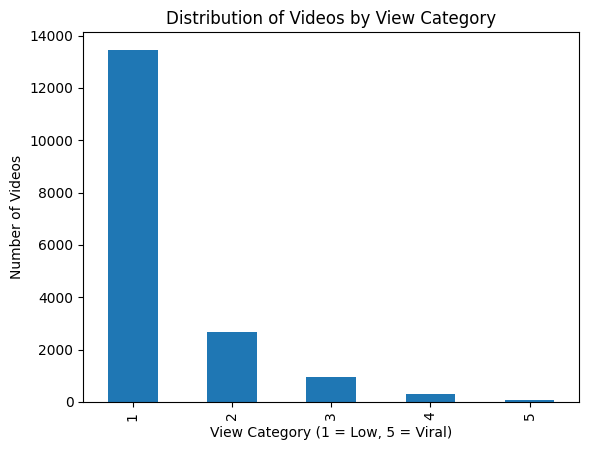

In [11]:
data["views_cat"] = pd.cut(
    data["views"],
    bins=[0, 1_000, 10_000, 100_000, 1_000_000, np.inf],
    labels=[1, 2, 3, 4, 5]
)

# plotting 
data['views_cat'].value_counts().plot.bar()
plt.xlabel("View Category (1 = Low, 5 = Viral)")
plt.ylabel("Number of Videos")
plt.title("Distribution of Videos by View Category")
plt.show()
data = data.dropna(subset=["views_cat"])

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit


strat_set = []
split = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)


for train_idx, test_idx in split.split(data, data["views_cat"]):
    strat_train_set = data.iloc[train_idx]
    strat_test_set = data.iloc[test_idx]
    strat_set.append([strat_test_set , strat_train_set])



In [13]:
strat_test_set['views_cat'].value_counts()/len(strat_test_set)

views_cat
1    0.772388
2    0.153272
3    0.053387
4    0.016648
5    0.004305
Name: count, dtype: float64

after that there are no further use of "views_cat " column so we drop it 


In [14]:
for set_ in (strat_test_set,strat_train_set):
    set_.drop("views_cat",axis=1 , inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_988\322518618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("views_cat",axis=1 , inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_988\322518618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("views_cat",axis=1 , inplace=True)


# VISUALIZE 
making copy of full set 


In [15]:
data = strat_train_set.copy()


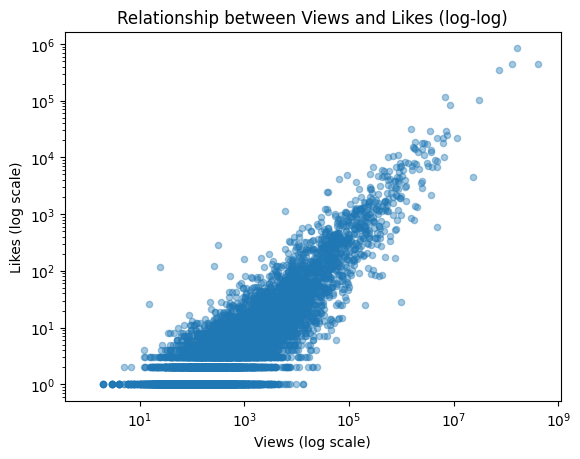

In [16]:
data.plot(kind="scatter", x="views", y="likes", alpha=0.4)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Views (log scale)")
plt.ylabel("Likes (log scale)")
plt.title("Relationship between Views and Likes (log-log)")
plt.show()


# 🧩 What is Correlation

Correlation measures how strongly two numeric features move together.

Formally:

It’s a statistical measure that tells us how one variable changes when another changes.

In [17]:
data.corr(numeric_only=True)


,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),views,likes,comments
duration,1.000000,0.027612,0.013523,0.083986,0.059256,0.014014,0.016346,0.002942,0.009117,0.034254
bitrate,0.027612,1.000000,0.995340,0.838670,0.840638,0.185207,0.644526,-0.004218,0.001383,0.002104
bitrate(video),0.013523,0.995340,1.000000,0.829837,0.833319,0.191864,0.639287,-0.004554,0.000914,0.001790
height,0.083986,0.838670,0.829837,1.000000,0.904994,0.214343,0.683502,0.003279,0.013822,0.025881
width,0.059256,0.840638,0.833319,0.904994,1.000000,0.232406,0.648160,0.000250,0.010070,0.021455
frame rate,0.014014,0.185207,0.191864,0.214343,0.232406,1.000000,0.178837,-0.006417,-0.004359,-0.003837
frame rate(est.),0.016346,0.644526,0.639287,0.683502,0.648160,0.178837,1.000000,-0.001135,0.010094,0.012484
views,0.002942,-0.004218,-0.004554,0.003279,0.000250,-0.006417,-0.001135,1.000000,0.778473,0.291432
likes,0.009117,0.001383,0.000914,0.013822,0.010070,-0.004359,0.010094,0.778473,1.000000,0.485253
comments,0.034254,0.002104,0.001790,0.025881,0.021455,-0.003837,0.012484,0.291432,0.485253,1.000000


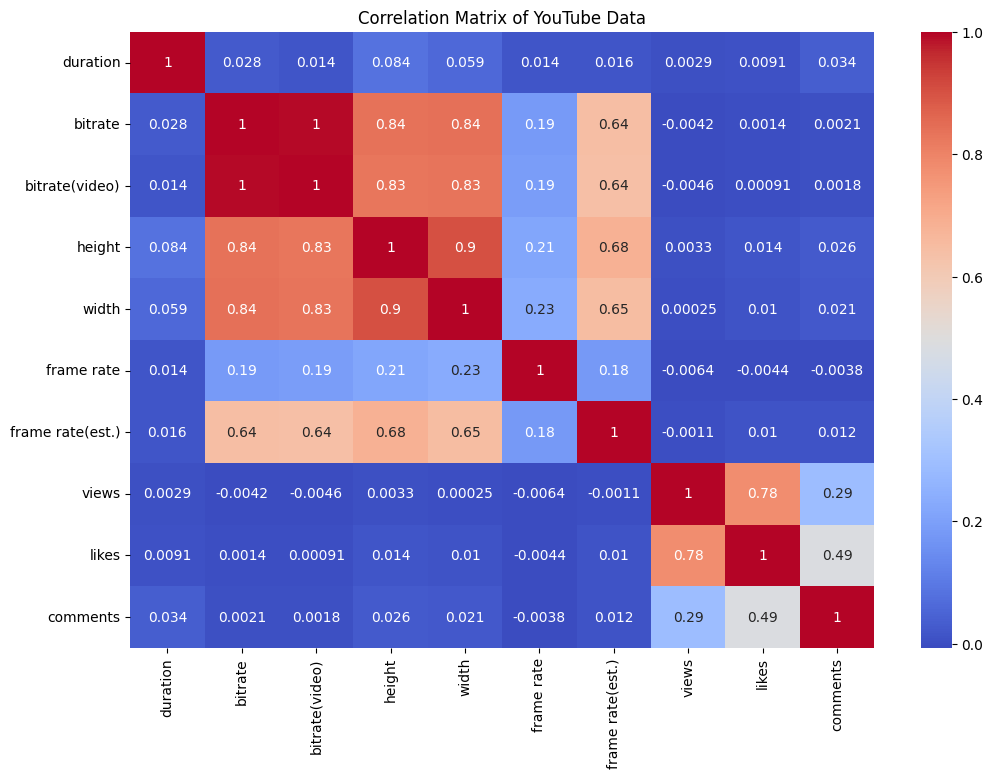

In [18]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of YouTube Data")
plt.show()

In [19]:
train_set = strat_train_set.copy()
test_set = strat_test_set.copy()


creating the copy of the train data set 


In [20]:
data = strat_train_set.drop('views' ,axis =1 )
data_label = strat_train_set['views'].copy()


In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')


find all the numeric column 

In [22]:
data_numeric = data.select_dtypes(include=[np.number])


apply the imputer to data_numeric

In [23]:
imputer.fit(data_numeric)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [24]:
imputer.statistics_

array([138.  , 744.  , 633.  , 640.  , 480.  ,  29.97,   0.  ,   1.  ,
         0.  ])

In [25]:
X = imputer.transform(data_numeric)

In [26]:
training_set_impute = pd.DataFrame(data_numeric, columns=data_numeric.columns, index=data_numeric.index)


# Handling Text And Categorical Attributes


Find the text and categorical attributes 

In [28]:
data_text_cat = data.select_dtypes(include=['object'])
data_text_cat.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13934 entries, 6435 to 7629
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   video_id     13934 non-null  object
 1   codec        13934 non-null  object
 2   category     13934 non-null  object
 3   url          13934 non-null  object
 4   title        13934 non-null  object
 5   description  13073 non-null  object
 6   hashtags     12679 non-null  object
dtypes: object(7)
memory usage: 870.9+ KB


here the codec , url , are not very useful so we drop these 
